# Deliverable 3 : Preprocessing the Data for a Neural Network Optimization

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [3]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [4]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df.drop(['EIN'],axis=1,inplace=True)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [6]:
# Look at NAME value counts for binning
name_counts = application_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

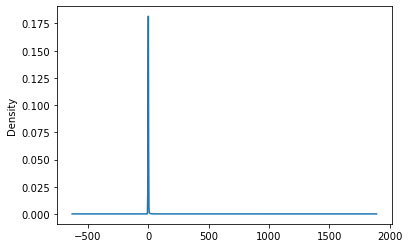

In [7]:
# Visualize the value counts of NAME
name_counts.plot.density()

In [8]:
len(list(name_counts[name_counts <= 5].index))

19214

In [9]:
# Determine which values to replace if counts are less than ...?
replace_name = list(name_counts[name_counts<5].index)

# Replace in dataframe
for app in replace_name:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: NAME, Length: 403, dtype: int64

In [10]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

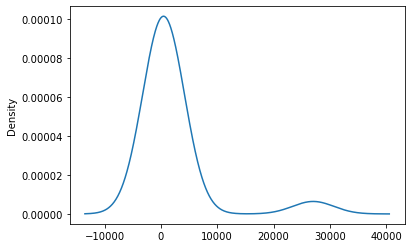

In [11]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than 700.
replace_application = list(application_counts[application_counts<700].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

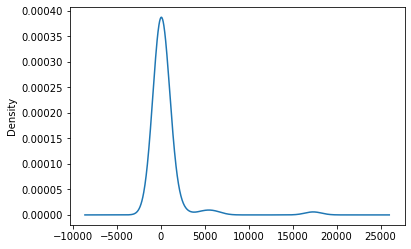

In [14]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [15]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts<1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [16]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes=='object'].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values
# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
X.shape

(34299, 445)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Attempt 1:Dropping EIN Column alone.Compile, Train and Evaluate the Model

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))



# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 3568      
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 3,619
Trainable params: 3,619
Non-trainable params: 0
_________________________________________________________________


2022-08-07 15:01:09.610346: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints1/",exist_ok=True)
checkpoint_path = "checkpoints1/weights.{epoch:02d}.hdf5"

In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [26]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5286 - accuracy: 0.7415
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4520 - accuracy: 0.7795
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4432 - accuracy: 0.7852
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4386 - accuracy: 0.7895
Epoch 5/100
772/804 [===========================>..] - ETA: 0s - loss: 0.4370 - accuracy: 0.7916
Epoch 5: saving model to checkpoints1/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4361 - accuracy: 0.7918
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4331 - accuracy: 0.7913
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4317 - accuracy: 0.7928
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4311 - accuracy: 0.7923
Epoch 9/100
804/804 [==============================] 

804/804 [==============================] - 1s 1ms/step - loss: 0.4088 - accuracy: 0.8048
Epoch 65/100
533/804 [==================>...........] - ETA: 0s - loss: 0.4118 - accuracy: 0.8031
Epoch 65: saving model to checkpoints1/weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4086 - accuracy: 0.8059
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4086 - accuracy: 0.8058
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4084 - accuracy: 0.8051
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4084 - accuracy: 0.8054
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4087 - accuracy: 0.8045
Epoch 70/100
523/804 [==================>...........] - ETA: 0s - loss: 0.4088 - accuracy: 0.8050
Epoch 70: saving model to checkpoints1/weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4082 - accuracy: 0.8057
Epoch 71/100
804/80

In [27]:
# Attempt1 : Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4634 - accuracy: 0.7906 - 436ms/epoch - 2ms/step
Loss: 0.4634423851966858, Accuracy: 0.7905539274215698


<AxesSubplot:>

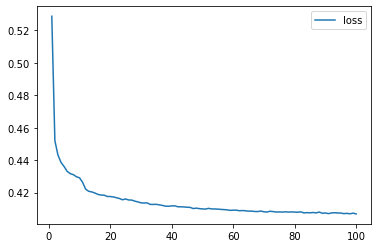

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

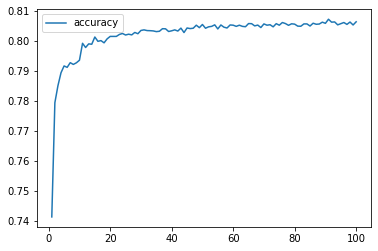

In [29]:
# Plot the accuracy
history_df.plot(y="accuracy")


# Attempt 2: Reducing the number of nodes
    

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 5
hidden_nodes_layer2 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))



# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 2230      
                                                                 
 dense_4 (Dense)             (None, 4)                 24        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 2,259
Trainable params: 2,259
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [34]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7341
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4559 - accuracy: 0.7824
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4425 - accuracy: 0.7877
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4388 - accuracy: 0.7884
Epoch 5/100
757/804 [===========================>..] - ETA: 0s - loss: 0.4366 - accuracy: 0.7889
Epoch 5: saving model to checkpoints2/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4372 - accuracy: 0.7881
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4340 - accuracy: 0.7905
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4330 - accuracy: 0.7891
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4324 - accuracy: 0.7907
Epoch 9/100
804/804 [==============================] 

804/804 [==============================] - 1s 1ms/step - loss: 0.4222 - accuracy: 0.7926
Epoch 65/100
538/804 [===================>..........] - ETA: 0s - loss: 0.4205 - accuracy: 0.7946
Epoch 65: saving model to checkpoints2/weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4223 - accuracy: 0.7931
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4219 - accuracy: 0.7929
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4220 - accuracy: 0.7928
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4219 - accuracy: 0.7937
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4215 - accuracy: 0.7935
Epoch 70/100
494/804 [=================>............] - ETA: 0s - loss: 0.4217 - accuracy: 0.7928
Epoch 70: saving model to checkpoints2/weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4217 - accuracy: 0.7936
Epoch 71/100
804/80

In [35]:
# Attempt 2: Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4597 - accuracy: 0.7799 - 361ms/epoch - 1ms/step
Loss: 0.4596855640411377, Accuracy: 0.7799416780471802


<AxesSubplot:>

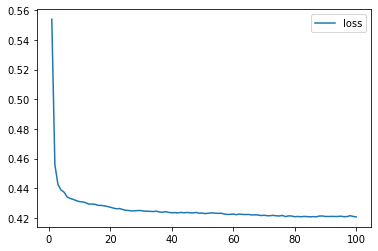

In [36]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

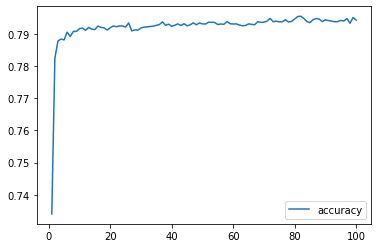

In [37]:
# Plot the accuracy
history_df.plot(y="accuracy")

# Attempt 3: Adding hidden layer

In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 4
hidden_nodes_layer2 = 3
hidden_nodes_layer3 = 3
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))



# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 1784      
                                                                 
 dense_7 (Dense)             (None, 3)                 15        
                                                                 
 dense_8 (Dense)             (None, 3)                 12        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 1,815
Trainable params: 1,815
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints3/",exist_ok=True)
checkpoint_path = "checkpoints3/weights.{epoch:02d}.hdf5"

In [40]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [42]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5915 - accuracy: 0.6849
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5226 - accuracy: 0.7128
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5084 - accuracy: 0.7520
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5030 - accuracy: 0.7454
Epoch 5/100
750/804 [==========================>...] - ETA: 0s - loss: 0.4988 - accuracy: 0.7452
Epoch 5: saving model to checkpoints3/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4992 - accuracy: 0.7448
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4973 - accuracy: 0.7458
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4954 - accuracy: 0.7465
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4939 - accuracy: 0.7469
Epoch 9/100
804/804 [==============================] 

804/804 [==============================] - 1s 1ms/step - loss: 0.4693 - accuracy: 0.7724
Epoch 65/100
507/804 [=================>............] - ETA: 0s - loss: 0.4684 - accuracy: 0.7726
Epoch 65: saving model to checkpoints3/weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4695 - accuracy: 0.7715
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4689 - accuracy: 0.7731
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4690 - accuracy: 0.7722
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4680 - accuracy: 0.7723
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4682 - accuracy: 0.7716
Epoch 70/100
514/804 [==================>...........] - ETA: 0s - loss: 0.4653 - accuracy: 0.7730
Epoch 70: saving model to checkpoints3/weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4676 - accuracy: 0.7718
Epoch 71/100
804/80

In [43]:
# Attempt 3: Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4890 - accuracy: 0.7663 - 473ms/epoch - 2ms/step
Loss: 0.4889514148235321, Accuracy: 0.7662973999977112


<AxesSubplot:>

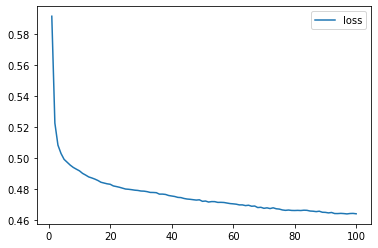

In [44]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

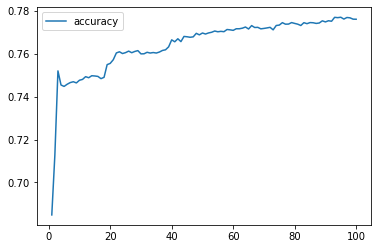

In [45]:
# Plot the accuracy
history_df.plot(y="accuracy")

# Attempt 4: Changing from Relu to Tanh activation

In [46]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 5
hidden_nodes_layer2 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))



# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 5)                 2230      
                                                                 
 dense_11 (Dense)            (None, 4)                 24        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,259
Trainable params: 2,259
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints4/",exist_ok=True)
checkpoint_path = "checkpoints4/weights.{epoch:02d}.hdf5"

In [48]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [50]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5130 - accuracy: 0.7547
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4474 - accuracy: 0.7876
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4382 - accuracy: 0.7903
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4339 - accuracy: 0.7936
Epoch 5/100
783/804 [============================>.] - ETA: 0s - loss: 0.4313 - accuracy: 0.7923
Epoch 5: saving model to checkpoints4/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4310 - accuracy: 0.7928
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4286 - accuracy: 0.7955
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4269 - accuracy: 0.7957
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4260 - accuracy: 0.7975
Epoch 9/100
804/804 [==============================] 

804/804 [==============================] - 1s 1ms/step - loss: 0.4128 - accuracy: 0.8033
Epoch 65/100
511/804 [==================>...........] - ETA: 0s - loss: 0.4098 - accuracy: 0.8065
Epoch 65: saving model to checkpoints4/weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4129 - accuracy: 0.8036
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4126 - accuracy: 0.8025
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4127 - accuracy: 0.8043
Epoch 68/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4125 - accuracy: 0.8036
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4128 - accuracy: 0.8038
Epoch 70/100
501/804 [=================>............] - ETA: 0s - loss: 0.4101 - accuracy: 0.8047
Epoch 70: saving model to checkpoints4/weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.4125 - accuracy: 0.8030
Epoch 71/100
804/80

In [51]:
# Attempt 4: Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4445 - accuracy: 0.7897 - 373ms/epoch - 1ms/step
Loss: 0.4445495903491974, Accuracy: 0.7897375822067261


<AxesSubplot:>

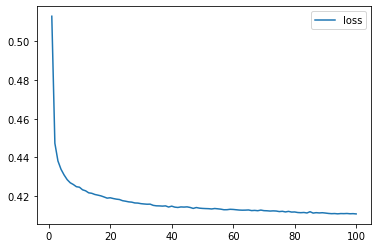

In [52]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

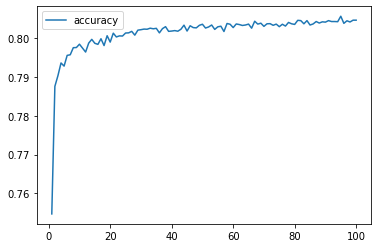

In [53]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [55]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")